# Clase 1
## 3- Convolución
### Convolución Imágenes

(<matplotlib.image.AxesImage at 0x7f8fac64c510>, Text(0.5,1,'Original'))

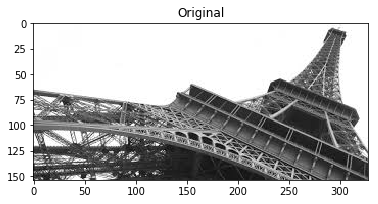

In [15]:
import scipy.signal as sig
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

import cv2
img = cv2.imread('img/eiffel.png')

plt.imshow(img),plt.title('Original')

[[ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]]


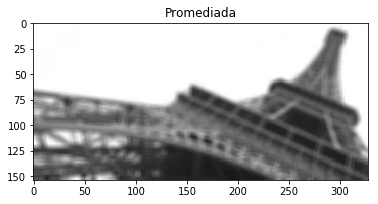

In [28]:
kernel_size = 6
kernel1 = np.ones((kernel_size,kernel_size))
karea= np.power(kernel_size,2)
kernel1.fill(0.04*25/karea)
img_k1 = cv2.filter2D(img,-1,kernel1)

print (kernel1)
plt.title('Promediada')
plt.imshow(img_k1)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0. -1.  5. -1.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


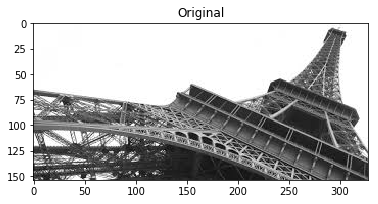

(<matplotlib.image.AxesImage at 0x7f8fa7201950>, Text(0.5,1,'Enfoque'))

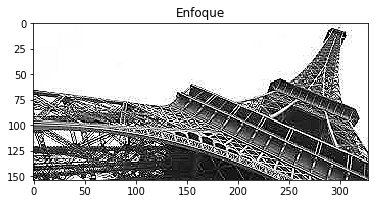

In [32]:
kernel2 = np.zeros((5,5))
kernel2[2,1:4].fill(-1)
kernel2[1:4,2].fill(-1)
kernel2[2,2]=5

print (kernel2)

img_k2 = cv2.filter2D(img,-1,kernel2)

plt.imshow(img),plt.title('Original')
plt.show()
plt.imshow(img_k2),plt.title('Enfoque')

### Reverberación por Convolución (Sonido)

In [33]:
input_rate,input_sig=scipy.io.wavfile.read('audio_samples/JoeBonamassa.wav')
IR_rate,IR_sig=scipy.io.wavfile.read('audio_samples/1a_marble_hall.wav')

rate=input_rate
con_len=-1
out_0=sig.fftconvolve(input_sig[:con_len,0],IR_sig[:con_len,0])
out_0=out_0/np.max(np.abs(out_0))
scipy.io.wavfile.write('audio_samples/Result_1a_marble_hall.wav', rate ,out_0)
print "done"

done
